In [1]:
import numpy as np
import numpy.ma as ma
import os
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.stats import sigma_clipped_stats, sigma_clip
import subprocess
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# cd /home/poorvi/Desktop/ph556_astro/project

In [3]:
ls

 data/
 info.csv
'Literature review for UZcom.xlsx'
 Periodogram_draft.ipynb
'PH556 - UZcom - Manual Magnitude Calculation.csv'
 Phase_coverage_final.ipynb
 photometry.ipynb
 photometry_neilabh_image.ipynb
 photometry_of_all_images.ipynb
 photometry_Vignette_image.ipynb
'P-L relationship in rr-lyraes.docx'
'Screenshot from 2021-04-16 20-40-20.png'


In [4]:
data_dir='data'
date_folders = [
    f.path for f in os.scandir(data_dir) if not f.is_file()]
date_folders.sort()
print(date_folders)

['data/20210319', 'data/20210322', 'data/20210326', 'data/20210410', 'data/20210411']


In [5]:
import pandas as pd
from math import modf

images=[]
img_ind=[]
date_ind=[]

for i in range(len(date_folders)):
    date=date_folders[i]
    new_images = [f.path for f in os.scandir(date) if f.is_file() and f.path.endswith(('.fits'))]
    l=len(new_images)
    date_ind=np.append(date_ind, np.repeat(i,l))
    images.append(new_images)
    

all_images = [item for sublist in images for item in sublist]


df=pd.DataFrame({'img_index': np.arange(len(all_images)), 'date_index': date_ind})


from dateutil import parser
P=0.736941*24*60*60
times=[]
for img in all_images:
    f = fits.open(img)
    data = f[0].data 
    header = f[0].header
    date=header['DATE-OBS'][:10]
    time=header['DATE-OBS'][11:]
    date_time_str=date + ' '+ time
    t= parser.parse(date_time_str)
    times.append(t)

times.sort()
phase=[modf(((ti-times[0]).total_seconds())/P)[0] for ti in times ]

df['time']=times
df['phase']=phase
print(df)

    img_index  date_index                    time     phase
0           0         0.0 2021-03-19 16:19:54.110  0.000000
1           1         0.0 2021-03-19 16:22:22.110  0.002324
2           2         0.0 2021-03-19 17:25:11.110  0.061519
3           3         0.0 2021-03-19 17:27:03.110  0.063278
4           4         1.0 2021-03-22 16:20:02.120  0.071008
5           5         1.0 2021-03-22 16:21:42.120  0.072579
6           6         1.0 2021-03-22 17:20:05.120  0.127595
7           7         1.0 2021-03-22 18:20:04.120  0.184119
8           8         1.0 2021-03-22 18:21:46.120  0.185721
9           9         1.0 2021-03-22 19:20:02.120  0.240628
10         10         1.0 2021-03-22 19:21:42.120  0.242199
11         11         1.0 2021-03-22 20:20:06.120  0.297231
12         12         1.0 2021-03-22 20:22:28.120  0.299461
13         13         1.0 2021-03-22 21:22:27.120  0.355985
14         14         1.0 2021-03-22 21:24:07.120  0.357556
15         15         2.0 2021-03-26 16:

<Figure size 1800x1200 with 0 Axes>

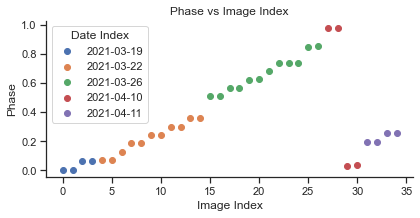

In [45]:
from  matplotlib import pyplot as plt
import seaborn
seaborn.set(style='ticks')

np.random.seed(0)

dates_pos=[0,1,2,3,4]
plt.figure(dpi = 300)
plt.tight_layout()
fg = seaborn.FacetGrid(data=df, hue='date_index', hue_order=dates_pos, aspect=2)
fg.map(plt.scatter, 'img_index', 'phase')
plt.title("Phase vs Image Index")
# plt.ylabel("Phase")
# plt.xlabel("Image Index")
L=plt.legend(title = "Date Index", loc = 2)
L.get_texts()[0].set_text("2021-03-19")
L.get_texts()[1].set_text("2021-03-22")
L.get_texts()[2].set_text("2021-03-26")
L.get_texts()[3].set_text("2021-04-10")
L.get_texts()[4].set_text("2021-04-11")
# ["2021-03-19", "2021-03-22", "2021-03-26", "2021-04-10", "2021-04-11"]
fg.set_axis_labels("Image Index", "Phase")
plt.savefig('Phase vs Image Index.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

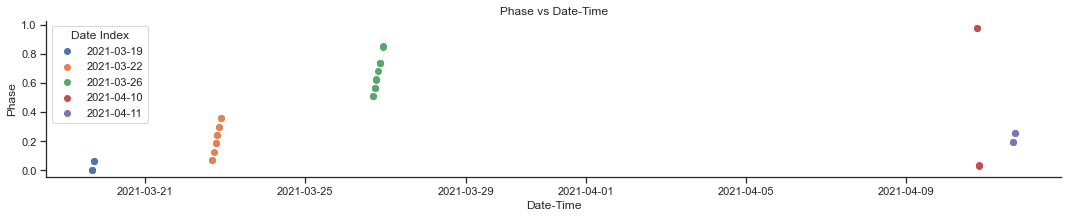

In [57]:
# phase ascending order
# phase vs time
seaborn.set(style='ticks')

np.random.seed(1)
# seaborn.set(rc={'figure.figsize':(6.4, 4.8)})
dates_pos=[0,1,2,3,4]
plt.figure(dpi = 300, figsize = [6.4, 4.8])
fg = seaborn.FacetGrid(data=df, hue='date_index', hue_order=dates_pos, aspect=5)
fg.map(pyplot.scatter, 'time', 'phase')
plt.title("Phase vs Date-Time")
# plt.ylabel("Phase")
# plt.xlabel("Image Index")
L=plt.legend(title = "Date Index", loc = 2)
L.get_texts()[0].set_text("2021-03-19")
L.get_texts()[1].set_text("2021-03-22")
L.get_texts()[2].set_text("2021-03-26")
L.get_texts()[3].set_text("2021-04-10")
L.get_texts()[4].set_text("2021-04-11")
# ["2021-03-19", "2021-03-22", "2021-03-26", "2021-04-10", "2021-04-11"]
fg.set_axis_labels("Date-Time", "Phase")
plt.savefig('Phase vs Date Time.png', dpi=300, bbox_inches='tight')
plt.show()

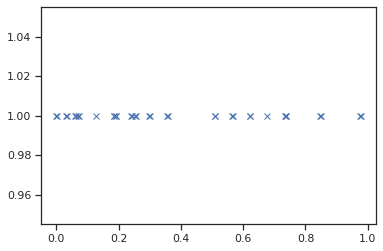

In [10]:
df1=df.sort_values('phase')
ar=np.array(df1['phase'])
# plt.plot(arr)
# plt.show()

# plt.plot(ar, np.zeros_like(ar) + val, 'x')
# plt.show()

plt.plot(ar, len(ar) * [1], "x")